In [3]:
import gym
import numpy as np
env = gym.make('CartPole-v1')
env.seed(101)
np.random.seed(101)
import torch

print('observation space:', env.observation_space)
print('action space:', env.action_space.n)

observation space: Box(4,)
action space: 2


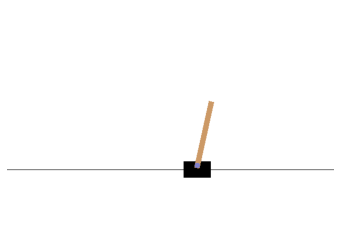

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

from agent import Agent

agent = Agent(env)
agent.load_state_dict(torch.load('../checkpointCartPole.pth'))

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
while True:
    state = torch.from_numpy(state).float()
    with torch.no_grad():
        action = agent.forward(state)
    next_state, reward, done, _ = env.step(np.argmax(action.numpy()))
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)    
    state = next_state
    if done:
        break

env.close()